# Project: Investigate a Dataset (TMDb movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This section briefly introduces the dataset chosen for analysis. At the end of this section, I shall list out the questions that I have explored and answered in the course of the project.
> #### Introduction to dataset:
> I will be using TMDB movie dataset, This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


In [1]:
# import all the packages needed for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import operator
import csv
from datetime import datetime
import matplotlib.pyplot as plt
# to print the visualization
%matplotlib inline

<a id='wrangling'></a>

## Data Wrangling - Presenting the data
>#### Reading the data:
>load the data and check some rows from the dataset to identify the questions that can be answered:

In [2]:
# read a csv file and store the dataset in pandas dataframe variable tmdb_data

tmdb_data = pd.read_csv('dataset/tmdb-movies.csv')

>#### Printing the datas' data type and dimensions
>The TMDB dataset consist of 10866 rows and 21 columns.

In [3]:
print(tmdb_data.shape)

(10866, 21)


>#### Print the data columns
>Lets find out the name of the columns for this dataset

In [4]:
print(list(tmdb_data.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


>#### Inspect the first 10 rows from the dataset
>Displayed below is th first 10 rows of TMDB dataset. Lets look at the columns. There is the id column which uniquely identifies each row - entry, which on its side represents each movie. There are other columns which describes movie popularity, financial status like budget and revenue. Other columns include information like genre of the movie, the production companies, movie release date.

In [5]:
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>#### Data Cleaning
>In this section, data cleaning shall be performed. The columns that were selected for the preprocessing will be used for the cells below.

In [6]:
# check information on datatypes of columns and missing values.
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# calculate the number of duplicated rows
sum(tmdb_data.duplicated())

1

> #### Cleaning that needs to be prformed by looking at above data:
> <ol>
> <li>First, remove columns such as 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count' and 'vote_average'.</li>
> <li>Second, Lets delete the one duplicated row that we have in our dataset.</li>
> <li>Third, There are lots of movies where the budget or revenue have a value of '0' which means that the values of those movies has not been recorded. Also, removing nan values from cast column, keeping only movies, that has casted actors. So we need to discard this rows, since we cannot calculate profit of such movies</li>
> <li>Fourth, The 'release_date' column must be converted into date format.</li>
> <li>Fifth, Convert budget and revenue column to int datatype.</li>
> <li>Sixth, Replace runtime value of 0 to NAN, Since it will affect the result.</li>
> </ol>

### Data Cleaning (Lets us perform all the steps that are discussed above for cleaning)

> First, remove columns such as 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count' and 'vote_average'.

In [8]:
# columns to be deleted
delete_columns= ['id','imdb_id','popularity','budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count', 'vote_average']

# drop the columns from the dataset
tmdb_data.drop(delete_columns, axis=1, inplace=True)

#look at the new dataset
tmdb_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


In [9]:
# store rows and columns using the shape function
rows, col= tmdb_data.shape

#since the row includes count of the header, the count needs to be removed
print('There is {} rows and {} columns in the dataset.'.format(rows-1,col))

There is 10865 rows and 8 columns in the dataset.


>Second, delete the duplicate row in the dataset

In [10]:
# drop the duplicated row but keep the first one
tmdb_data.drop_duplicates(keep='first', inplace=True)

#store rows and columns using the shape function
rows, col= tmdb_data.shape
print('There is {} rows and {} columns in the dataset.'.format(rows-1,col))

There is 10864 rows and 8 columns in the dataset.


> Third, There are lots of movies where the budget or revenue have a value of '0' which means that the values of those movies has not been recorded. Also, removing nan values from cast column, keeping only movies, that has casted actors. So we need to discard this rows, since we cannot calculate profit of such movies

In [11]:
#removing nan values from cast column, keeping only movies with casted actors.
tmdb_data=tmdb_data[tmdb_data["cast"].isnull() == False]

#remove nan values from genres column
tmdb_data=tmdb_data[tmdb_data["genres"].isnull() == False]

#remove rows where budget_adj and revenue_adj equals 0
tmdb_data=tmdb_data[tmdb_data.budget != 0]
tmdb_data=tmdb_data[tmdb_data.revenue != 0]

rows, col = tmdb_data.shape

print('We now have only {} rows.'.format(rows-1))

We now have only 3849 rows.


> Fourth, The *'release_date'* column must be converted into date format.

In [12]:
# convert column release_date to DateTime
#use pd
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

#the new dataset
tmdb_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


> Fifth, Convert budget and revenue column to int datatype.

In [13]:
# columns to convert datatype of
columns=['budget','revenue']
#convert these columns to int datatype
tmdb_data[columns]=tmdb_data[columns].applymap(np.int64)
# new datatype
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

> Sixth, Replace runtime value of 0 to NAN, Since it will affect the result.

In [14]:
# replace runtime value of 0 to NaN
tmdb_data['runtime'] = tmdb_data['runtime'].replace(0, np.NaN)


>#### Descriptive Statistics
>In this section, basic descriptive statistics are being presented for each column from the dataset

In [15]:
# basic descriptive statstics
tmdb_data.describe()

,budget,revenue,runtime,release_year
count,3.850000e+03,3.850000e+03,3850.000000,3850.000000
mean,3.724027e+07,1.077897e+08,109.228831,2001.260000
std,4.221487e+07,1.766015e+08,19.924053,11.284699
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.363273e+07,95.250000,1995.000000
50%,2.400000e+07,4.488472e+07,106.000000,2004.000000
75%,5.000000e+07,1.242969e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


<a id='eda'></a>

## Exploratory Data analysis
>#### Question #1.1: actors with the most appearances in films
>Just by looking at the dataset and especially the casted actors per movie, one question that rises is the number of appearances per actor. Paraphasing the question, we can say who are the actors that appeared the most in the movies from the dataset. The following code snippet finds these actors.

C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


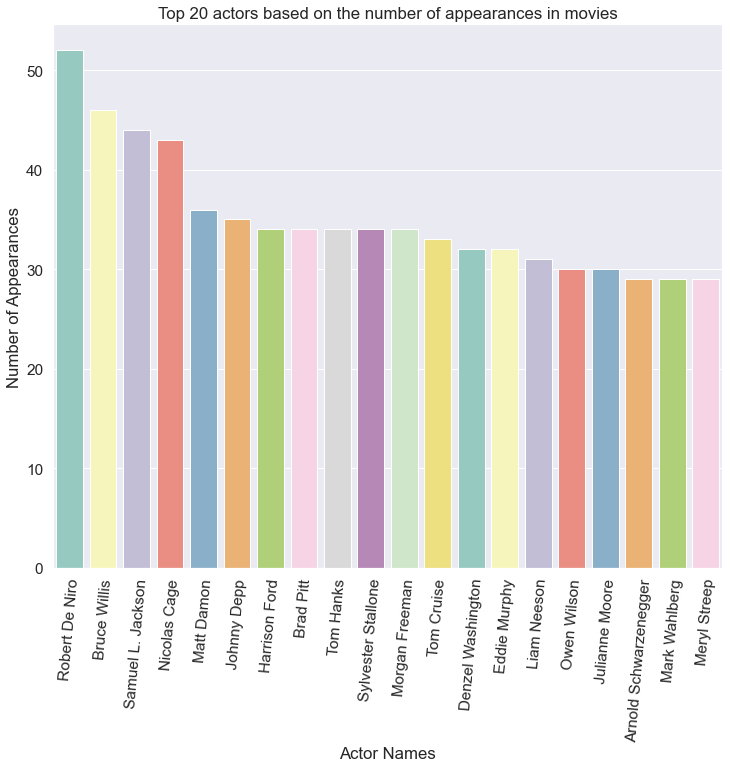

In [16]:
#create a dictionary for the cast, and how many times each actor casted for movies

actor_dict= {}

actors = tmdb_data["cast"]
actors=actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which just a float
    for actor in actorList:
        actor=actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor]=1
        else:
            actor_dict[actor] += 1

sorted_actor_dict = sorted(actor_dict.items(), key=operator.itemgetter(1), reverse=True)
#sorted_actor_dict[0:10]

x_axis =list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])

sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis,y_axis, palette="Set3")

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)


ax.set(xlabel='Actor Names', ylabel='Number of Appearances', title='Top 20 actors based on the number of appearances in movies')
plt.show()

>It is clear from the figure above that the top 5 actors with the biggest number of appearances are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage and Michael Cane.

>#### Question 1.2: Which movie had the highest and lowest profit?
>Start by adding the profit column in the dataset.

In [17]:
# profit is obtained
tmdb_data['profit']= tmdb_data['revenue'] - tmdb_data['budget']

#new dataset
tmdb_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [18]:
# movie with the highest profit
tmdb_data.loc[tmdb_data['profit'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [19]:
# movie with the lowest profit
tmdb_data.loc[tmdb_data['profit'].idxmin()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

>#### To answer the question
>Highest profit :: Avatar with a profit of 2544505847 dollars
>
>Lowest profit :: The Warrio's Way witha profit of -413912431 dollars

>#### Question 1.3: Which movie had the greatest and least runtime?

In [20]:
# movie with the highest runtime
tmdb_data.loc[tmdb_data['runtime'].idxmax()]

budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
profit                                                    -17128721
Name: 2107, dtype: object

In [21]:
# movie with the lowest runtime
tmdb_data.loc[tmdb_data['runtime'].idxmin()]

budget                                                           10
revenue                                                           5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
profit                                                           -5
Name: 5162, dtype: object

>#### to answer the question
>Highest runtime :: Carlow with a runtime of 338 minutes
>
>Lowest runtime :: Kid's Story with a runtime of 15 minutes

#### Question 1.4: what is the average runtime of all movies?

In [22]:
# average runtime of all movies
tmdb_data['runtime'].mean()

109.22883116883116

>The average runtime of all movies is 109.23 minutes.
>
>Below is a histogram plot of number of movies against runtime of movies.

(array([  1.,   1.,   0.,   0.,   1.,   0.,   0.,   3.,   5.,  31., 196.,
        435., 598., 652., 475., 458., 305., 242., 141., 117.,  49.,  47.,
         21.,  23.,   9.,  10.,  10.,   8.,   6.,   0.,   2.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 15.  ,  21.46,  27.92,  34.38,  40.84,  47.3 ,  53.76,  60.22,
         66.68,  73.14,  79.6 ,  86.06,  92.52,  98.98, 105.44, 111.9 ,
        118.36, 124.82, 131.28, 137.74, 144.2 , 150.66, 157.12, 163.58,
        170.04, 176.5 , 182.96, 189.42, 195.88, 202.34, 208.8 , 215.26,
        221.72, 228.18, 234.64, 241.1 , 247.56, 254.02, 260.48, 266.94,
        273.4 , 279.86, 286.32, 292.78, 299.24, 305.7 , 312.16, 318.62,
        325.08, 331.54, 338.  ]),
 <BarContainer object of 50 artists>)

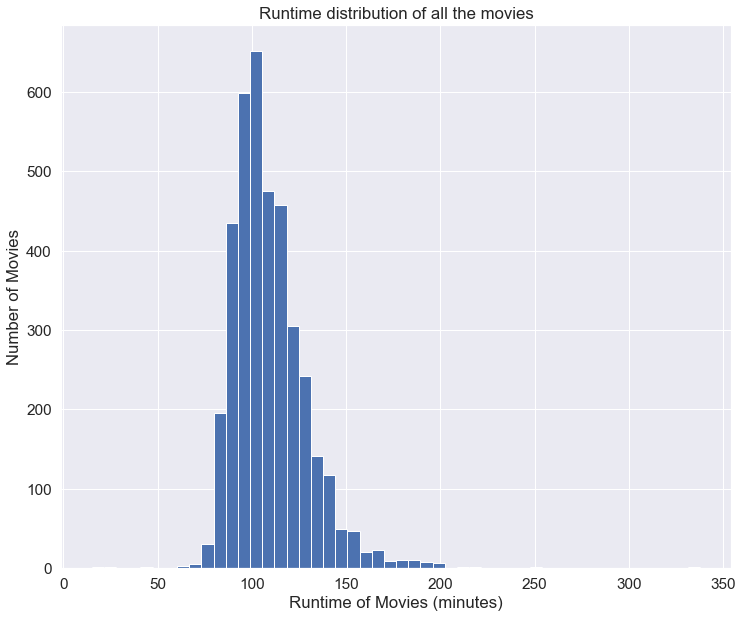

In [23]:
plt.xlabel('Runtime of Movies (minutes)')
plt.ylabel('Number of Movies')
plt.title('Runtime distribution of all the movies')

#plot a histogram
plt.hist(tmdb_data['runtime'], bins=50)

>It can be seen that most movies are in the range 100-120 minutes.
>
>Lets check the relationship between the runtime and profit.

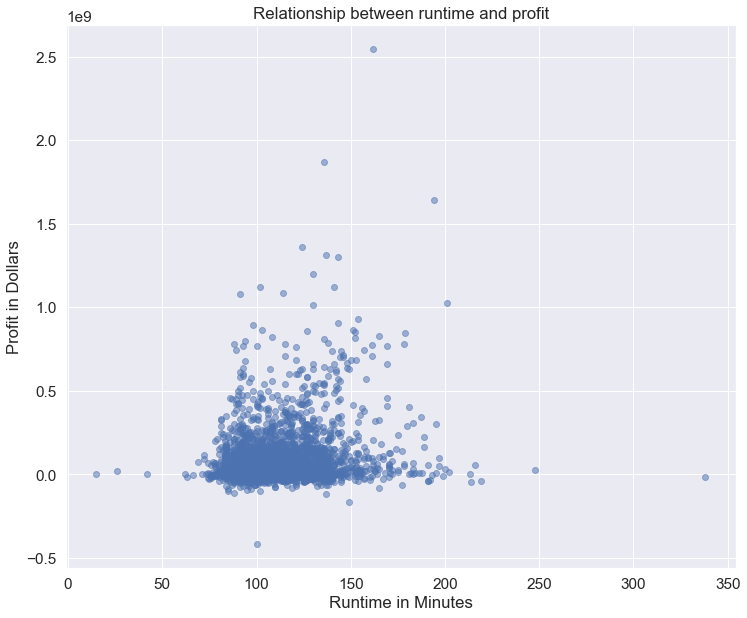

In [24]:
plt.xlabel('Runtime in Minutes')
plt.ylabel('Profit in Dollars')
plt.title('Relationship between runtime and profit')

plt.scatter(tmdb_data['runtime'], tmdb_data['profit'], alpha=0.5)
plt.show()

>Most movies have runtime in the range of 85-120 minutes

#### Question 1.5: Which movie had the highest and lowest budget?

In [25]:
# movie with the highest budget
tmdb_data.loc[tmdb_data['budget'].idxmax()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

In [26]:
# movie with the lowest budget
tmdb_data.loc[tmdb_data['budget'].idxmin()]

budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
runtime                                                          95
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
release_year                                                   1999
profit                                                           99
Name: 2618, dtype: object

> #### Which movie had the highest and lowest budget?
> Highest :: The Warrior's Way with budget of 425000000 dollars
>
> Lowest :: Lost & Found with budget of 1 dollars
>
> Let us check if there a relation between the Budget and Profit

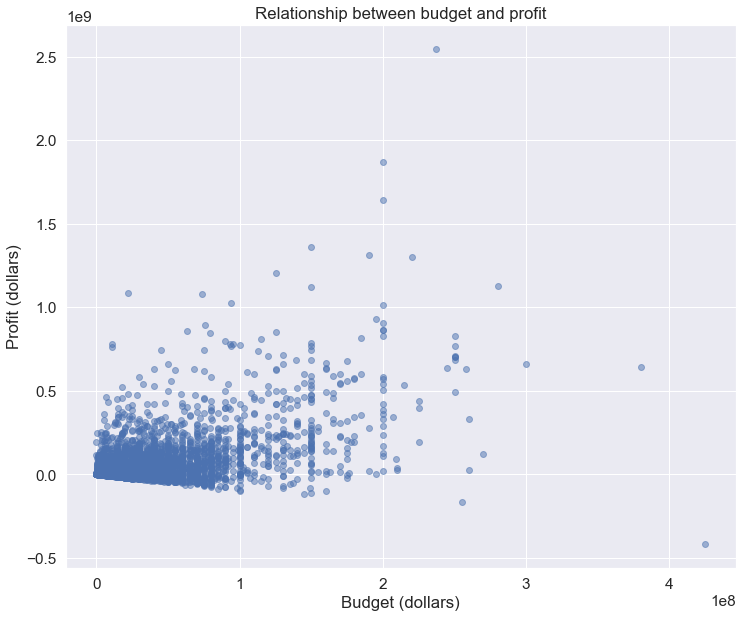

In [27]:
plt.xlabel('Budget (dollars)')
plt.ylabel('Profit (dollars)')
plt.title('Relationship between budget and profit')

#scatter plot
plt.scatter(tmdb_data['budget'], tmdb_data['profit'], alpha=0.5)
plt.show()

>There is less relationship between the budget and profit. Also there are less films that did not make profit even with a budget greater than 20 million dollars
#### Question 1.6: Which movie had the highest and lowest revenue?

In [28]:
# movie with the highest revenue
tmdb_data.loc[tmdb_data['revenue'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [29]:
# movie with the highest revenue
tmdb_data.loc[tmdb_data['revenue'].idxmin()]

budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
release_year                                                   2003
profit                                                     -5999998
Name: 5067, dtype: object

> #### Which movie had the highest and lowest revenue?
> Highest :: Avatar with revenue of 2781505847 dollars
>
> Lowest :: Shattered Glass with revenue of 2 dollars
>
> Let us check if there a relation between the Revenue and Profit

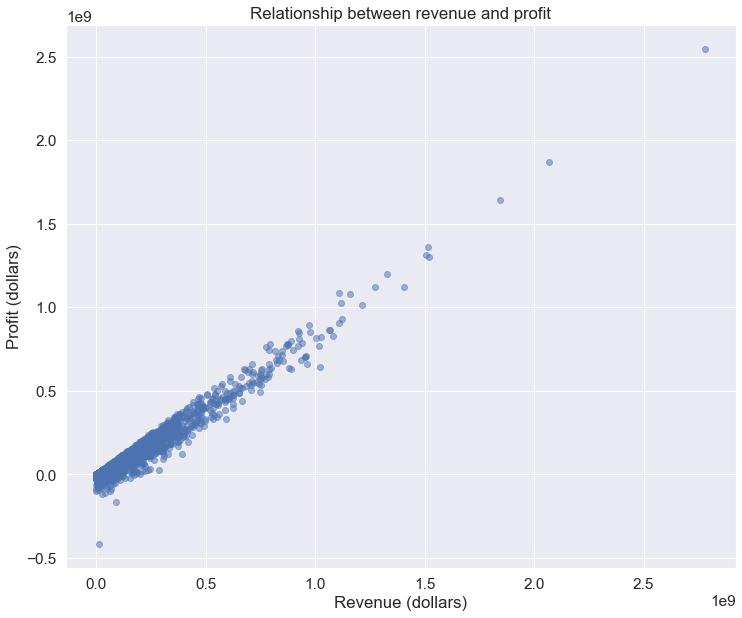

In [30]:
plt.xlabel('Revenue (dollars)')
plt.ylabel('Profit (dollars)')
plt.title('Relationship between revenue and profit')
plt.scatter(tmdb_data['revenue'], tmdb_data['profit'], alpha=0.5)
plt.show()

>The relationship between revenue and profit is directly proportional that is higher profit implies higher revenue.
>
>Lets check the relationship between revenue and budget.

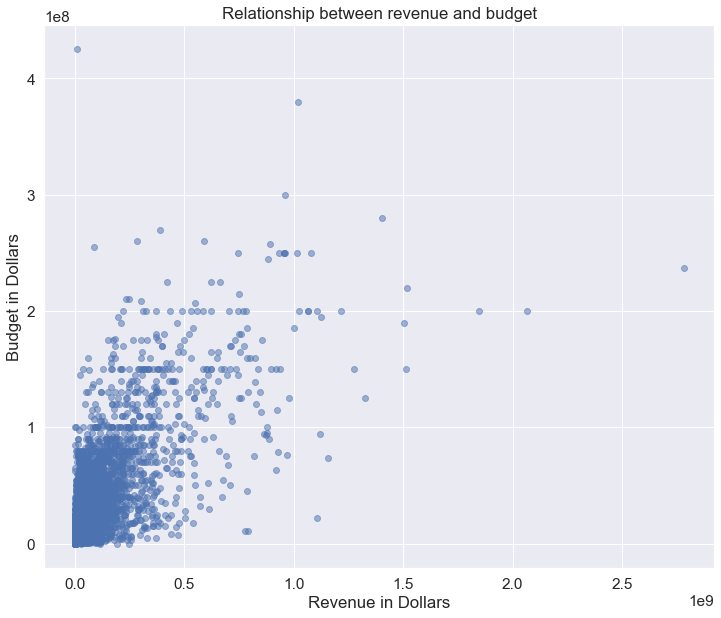

In [31]:
plt.xlabel('Revenue in Dollars')
plt.ylabel('Budget in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and budget')

plt.scatter(tmdb_data['revenue'], tmdb_data['budget'], alpha=0.5)
plt.show()

> Most of the movies have revenue more than 50M dollars.

#### Question 2.1: What is the average budget of the movie with respect to profit of movies making more than 25M?

> Now since in all the other question are answered with respect to profit, the dataset will be cleaned and only include data of movies who made profit of more then 25M Dollars.

In [32]:
# dataframe which has data of movies with a profit more than 25M dollars
tmdb_profit_data=tmdb_data[tmdb_data['profit']>=25000000]
#reindex the dataframe
tmdb_profit_data.index=range(len(tmdb_profit_data))
#show the new dataset
tmdb_profit_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [33]:
# print the info of the the new dataframe
tmdb_profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          1790 non-null   int64         
 1   revenue         1790 non-null   int64         
 2   original_title  1790 non-null   object        
 3   cast            1790 non-null   object        
 4   runtime         1790 non-null   int64         
 5   genres          1790 non-null   object        
 6   release_date    1790 non-null   datetime64[ns]
 7   release_year    1790 non-null   int64         
 8   profit          1790 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 126.0+ KB


>It can be seen that there are 1790 movies with profit more than 25M dollars

In [34]:
# find the average budget of movies with profit more than 25M dollars
tmdb_profit_data['budget'].mean()

51897888.93463687

>So the average budget of movies with respect to profit of movies more than 25M dollars is 51897888.93 dollars.

### Question 2.2: What is the average revenue of the movie with respect to Profit of movies making more then 25M Dollars?

In [35]:
# find the average revenue of movies with profit mgreater than 25M dollars
tmdb_data['revenue'].mean()

107789664.9064935

>So the average revenue of movies with respect to profit of movies more than 25M dollars is 206456066.26 dollars.

### Question 2.3: What is the average runtime of the movie with respect to Profit of movies making more then 25M Dollars?

In [36]:
# find the average runtime of movies with profit mgreater than 25M dollars
tmdb_data['runtime'].mean()

109.22883116883116

>So the average runtime of movies with respect to profit of movies more than 25M dollars is 112.58 minutes.

### Question 2.4: Which are the successfull genres with respect to Profit of movies making more then 25M Dollars?

In [37]:
# concatenate all the data with | from the whole column, the split it with | and count the number of times each genre occured
genres_count= pd.Series(tmdb_profit_data['genres'].str.cat(sep='|').split('|')).value_counts(ascending=False)
genres_count

Drama              688
Comedy             645
Action             566
Thriller           542
Adventure          451
Romance            292
Crime              287
Family             265
Science Fiction    250
Fantasy            227
Horror             191
Mystery            150
Animation          136
Music               62
History             59
War                 58
Western             20
Documentary          8
Foreign              1
TV Movie             1
dtype: int64

> So the Top 10 Genres are Drama, Comedy, Action, Thriller, Adventure, Romance, Crime, Family, Scince Fiction, Fantasy.
>
> Lets visualize this with a plot

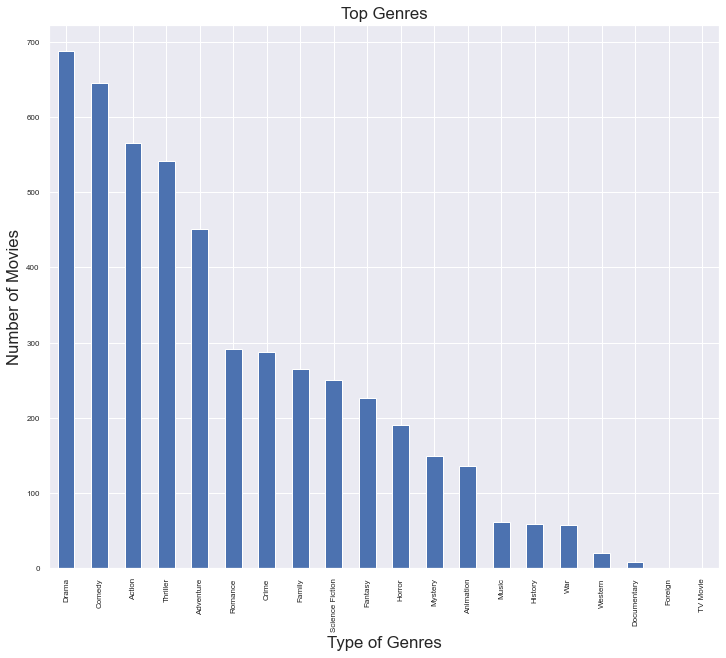

In [38]:
diagram = genres_count.plot.bar(fontsize = 8)
diagram.set(title= 'Top Genres')

diagram.set_xlabel('Type of Genres')
diagram.set_ylabel('Number of Movies')

plt.show()

> It can be seen in the visualization that most movies has drama as a genre which tends to higher profit.

### Question 2.5: Which are the most frequent cast involved with respect to Profit of movies making more than 25M Dollars?)

In [39]:
# concatenate all the data with | from the whole column, the split it with | and count the number of times each genre occured
cast_count= pd.Series(tmdb_profit_data['cast'].str.cat(sep='|').split('|')).value_counts(ascending=False)
cast_count.head(20)

Tom Cruise            29
Tom Hanks             28
Brad Pitt             27
Robert De Niro        26
Bruce Willis          25
Cameron Diaz          24
Samuel L. Jackson     23
Eddie Murphy          23
Mark Wahlberg         22
Sylvester Stallone    22
Johnny Depp           22
George Clooney        20
Jim Carrey            20
Robin Williams        20
Matt Damon            20
Harrison Ford         20
Adam Sandler          20
Denzel Washington     20
Ben Stiller           19
Owen Wilson           19
dtype: int64

> So the Top 5 cast are Tom Cruise, Tom Hanks, Brad Pitt, Robert De Niro, Bruce Willis
>
> Lets visualize this with a plot

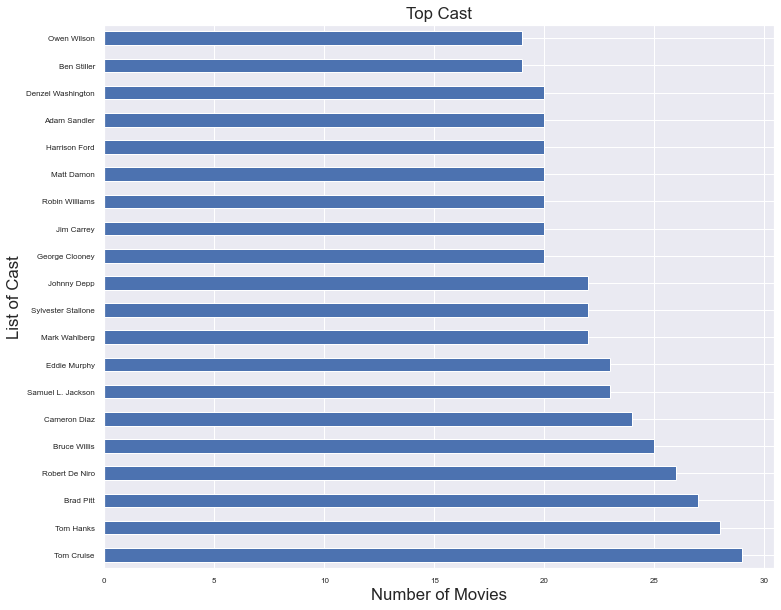

In [40]:
# initialize the plot
diagram = cast_count.head(20).plot.barh(fontsize=8)
diagram.set(title='Top Cast')

diagram.set_xlabel('Number of Movies')
diagram.set_ylabel('List of Cast')

plt.show()

> It can be seen in the visualization that most movies have Tom Cruise as a cast which tends to higher profit.

<a id='conclusions'></a>
## Conclusions

> #### So the conclusion is, that if we want to create movies which can give us a profit of more then 25M Dollars then
> The average budget of the movies can be arround 51870307.75 Dollars
>
> The average runtime of the movies can be arround 112.56 Minutes
>
> The Top 10 Genres we should focus on should be Drama, Comedy, Action, Thriller, Adventure, Romance, Crime, Family, Scince Fiction, Fantasy
> 
> The Top 5 cast we should focus on should be Tom Cruise, Tom Hanks, Brad Pitt, Robert De Niro, Bruce Willis
>
> The average revenue of the movies will be arround 206359440.87 Dollars

> #### The limitations associated with the conclusions are:
>The dataset contains are null and zero values in some features.  The zero values creates false results during the correlation plots.
> The conclusion is not full proof that given the above requirement the movie will be a big hit but it can be.
>
> Also, we also lost some of the data in the data cleaning steps where we dont know the revenue and budget of the movie, which has affected our analysis.
>
> This conclusion is not error proof.